In [138]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

In [172]:
ncategories = 3
ndim_name = 10
ndim_stim = 13
ndim = ndim_name+ndim_stim

# generate names and prototypes
names = np.array([[ 1,-1,-1,-1, 1,-1, 1, 1,-1, 1],
                  [-1, 1,-1, 1, 1, 1, 1, 1,-1,-1],
                  [-1,-1, 1, 1,-1,-1,-1, 1, 1,-1]])
protos = np.array([[-1,-1, 1, 1,-1, 1,-1,-1,-1, 1, 1, 1,-1],
                   [-1,-1, 1, 1, 1, 1,-1, 1, 1,-1,-1, 1, 1],
                   [ 1, 1,-1,-1,-1, 1, 1,-1, 1, 1,-1, 1, 1]])

# generate distorted exemplars
nexemplars = [3,6,9]
exemplars = []
distort = np.array([-1,-1,-1,-1,1,1,1,1,1,1,1,1,1])
for n in range(ncategories):
    for x in range(nexemplars[n]):
        np.random.shuffle(distort)
        exem = np.concatenate((names[n],protos[n]*distort))
        exemplars.append(exem)

In [189]:
# encode exemplars into memory
penc = 1
memory = []
for n in range(len(exemplars)):
    exem = exemplars[n]
    for x in range(len(exem)):
        if np.random.rand()>penc:
            exem[x] = 0
    memory.append(exem)


In [195]:
def retrieve(probe,memory):
    echo = np.zeros(ndim_stim)
    for n in range(len(memory)):
        activation = (sum(probe*memory[n][ndim_name:])/len(probe))**3
        echo = echo + activation*memory[n][:ndim_name]
    return echo/max(echo)

<Container object of 13 artists>

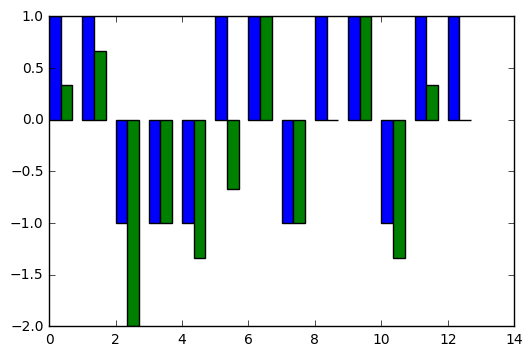

In [206]:
probe = names[2]
echo = retrieve(probe,memory)

xb = np.arange(ndim_stim)
width = 0.35
plt.bar(xb,protos[2],width)
plt.bar(xb+width,echo,width,color='g')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]